# __DSB24 - German credit__

[Kaggle Challenge - Link](https://www.kaggle.com/competitions/dsb-24-german-credit/overview)

In this competition, we will build the best possible classifier for a default risk… with a non classical metric!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

from google.colab import files
uploaded = files.upload()

Saving german_credit_test.csv to german_credit_test.csv
Saving german_credit_train.csv to german_credit_train.csv


In [3]:
train = pd.read_csv("german_credit_train.csv")
test = pd.read_csv("german_credit_test.csv")

## __EDA__

In [4]:
train.head()

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,unknown,57,none,own,2,skilled,1,none,yes,Risk


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CheckingStatus            3999 non-null   object
 1   LoanDuration              3999 non-null   int64 
 2   CreditHistory             3999 non-null   object
 3   LoanPurpose               3999 non-null   object
 4   LoanAmount                3999 non-null   int64 
 5   ExistingSavings           3999 non-null   object
 6   EmploymentDuration        3999 non-null   object
 7   InstallmentPercent        3999 non-null   int64 
 8   Sex                       3999 non-null   object
 9   OthersOnLoan              3999 non-null   object
 10  CurrentResidenceDuration  3999 non-null   int64 
 11  OwnsProperty              3999 non-null   object
 12  Age                       3999 non-null   int64 
 13  InstallmentPlans          3999 non-null   object
 14  Housing                 

In [6]:
train.describe()

,LoanDuration,LoanAmount,InstallmentPercent,CurrentResidenceDuration,Age,ExistingCreditsCount,Dependents
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,21.252063,3482.700925,2.968242,2.838460,35.896224,1.470618,1.163541
std,11.125595,2498.295579,1.131982,1.115138,10.628733,0.568098,0.369905
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1300.500000,2.000000,2.000000,28.000000,1.000000,1.000000
50%,21.000000,3250.000000,3.000000,3.000000,36.000000,1.000000,1.000000
75%,29.000000,5363.000000,4.000000,4.000000,44.000000,2.000000,1.000000
max,64.000000,11676.000000,6.000000,6.000000,74.000000,3.000000,2.000000


The dataset is very clean, with no missing values.

### __EDA - Variable analysis__

In [7]:
train.select_dtypes(exclude='number').columns

Index(['CheckingStatus', 'CreditHistory', 'LoanPurpose', 'ExistingSavings',
       'EmploymentDuration', 'Sex', 'OthersOnLoan', 'OwnsProperty',
       'InstallmentPlans', 'Housing', 'Job', 'Telephone', 'ForeignWorker',
       'Risk'],
      dtype='object')

In [8]:
numerical_features = train.select_dtypes(include='number').columns

# We don't want the 'Risk' columns to be included here, as me will use this list for the preprocessing afterwards
categorical_features = test.select_dtypes(exclude='number').columns

features = list(numerical_features) + list(categorical_features)

       LoanDuration    LoanAmount  InstallmentPercent  \
count   3999.000000   3999.000000         3999.000000   
mean      21.252063   3482.700925            2.968242   
std       11.125595   2498.295579            1.131982   
min        4.000000    250.000000            1.000000   
25%       12.000000   1300.500000            2.000000   
50%       21.000000   3250.000000            3.000000   
75%       29.000000   5363.000000            4.000000   
max       64.000000  11676.000000            6.000000   

       CurrentResidenceDuration          Age  ExistingCreditsCount  \
count               3999.000000  3999.000000           3999.000000   
mean                   2.838460    35.896224              1.470618   
std                    1.115138    10.628733              0.568098   
min                    1.000000    19.000000              1.000000   
25%                    2.000000    28.000000              1.000000   
50%                    3.000000    36.000000              1.000000

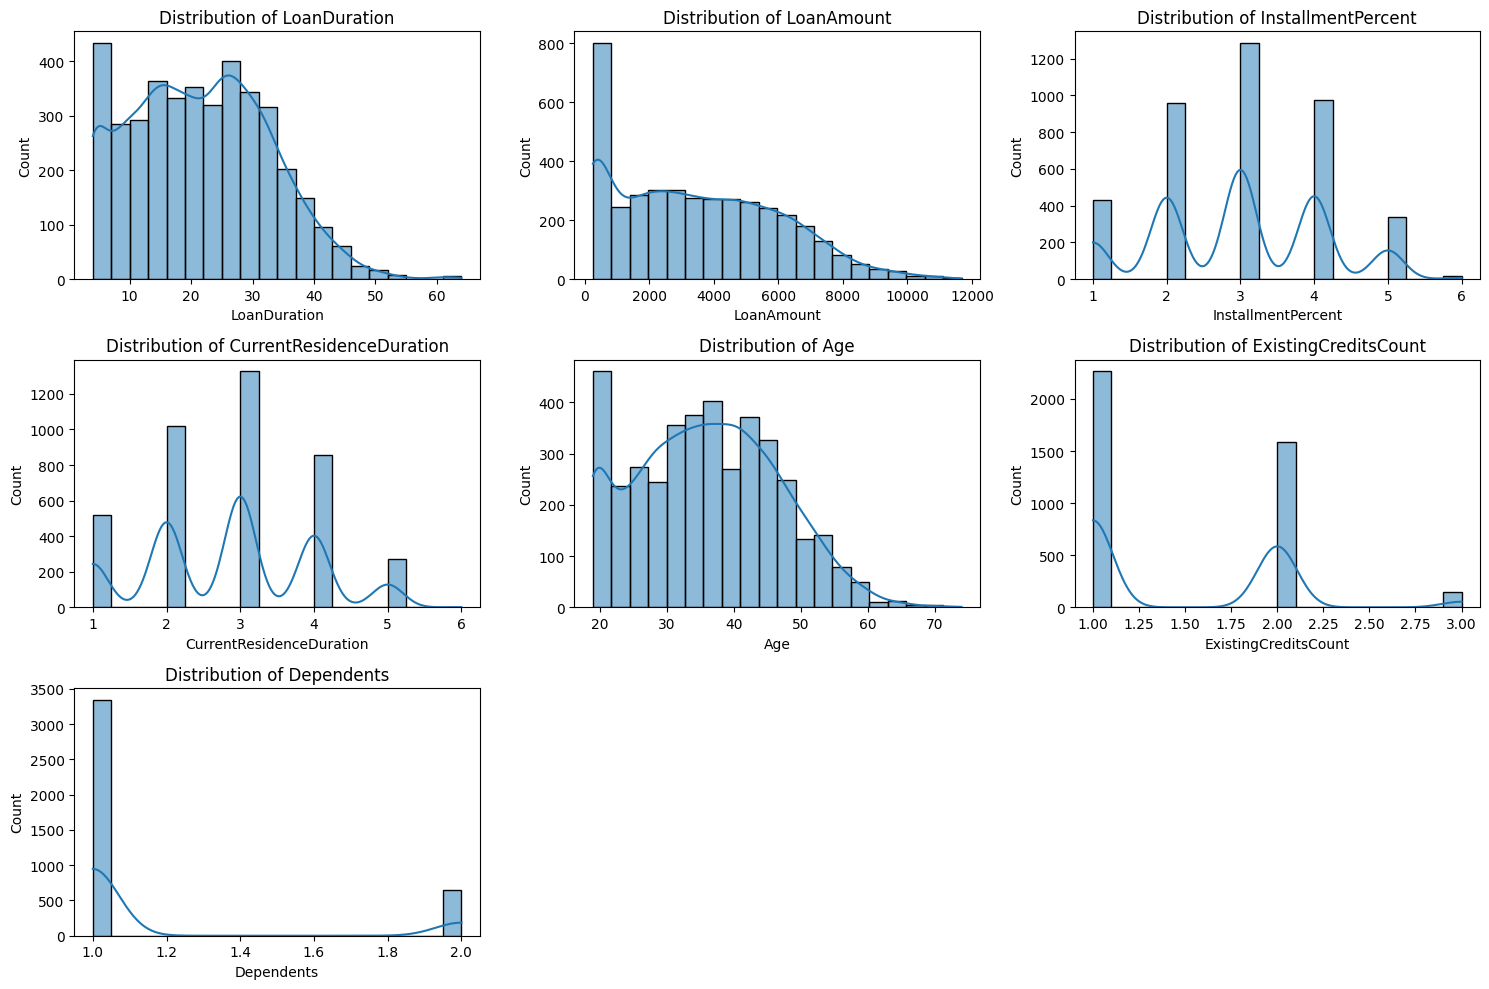

In [9]:
# Univariate analysis
plt.figure(figsize=(15,10))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(train[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()

numerical_stats = train[numerical_features].describe()
print(numerical_stats)

We can see that some variables such as LoanDuration, LoanAmount and Age follow a Gaussian distribution.

<Axes: >

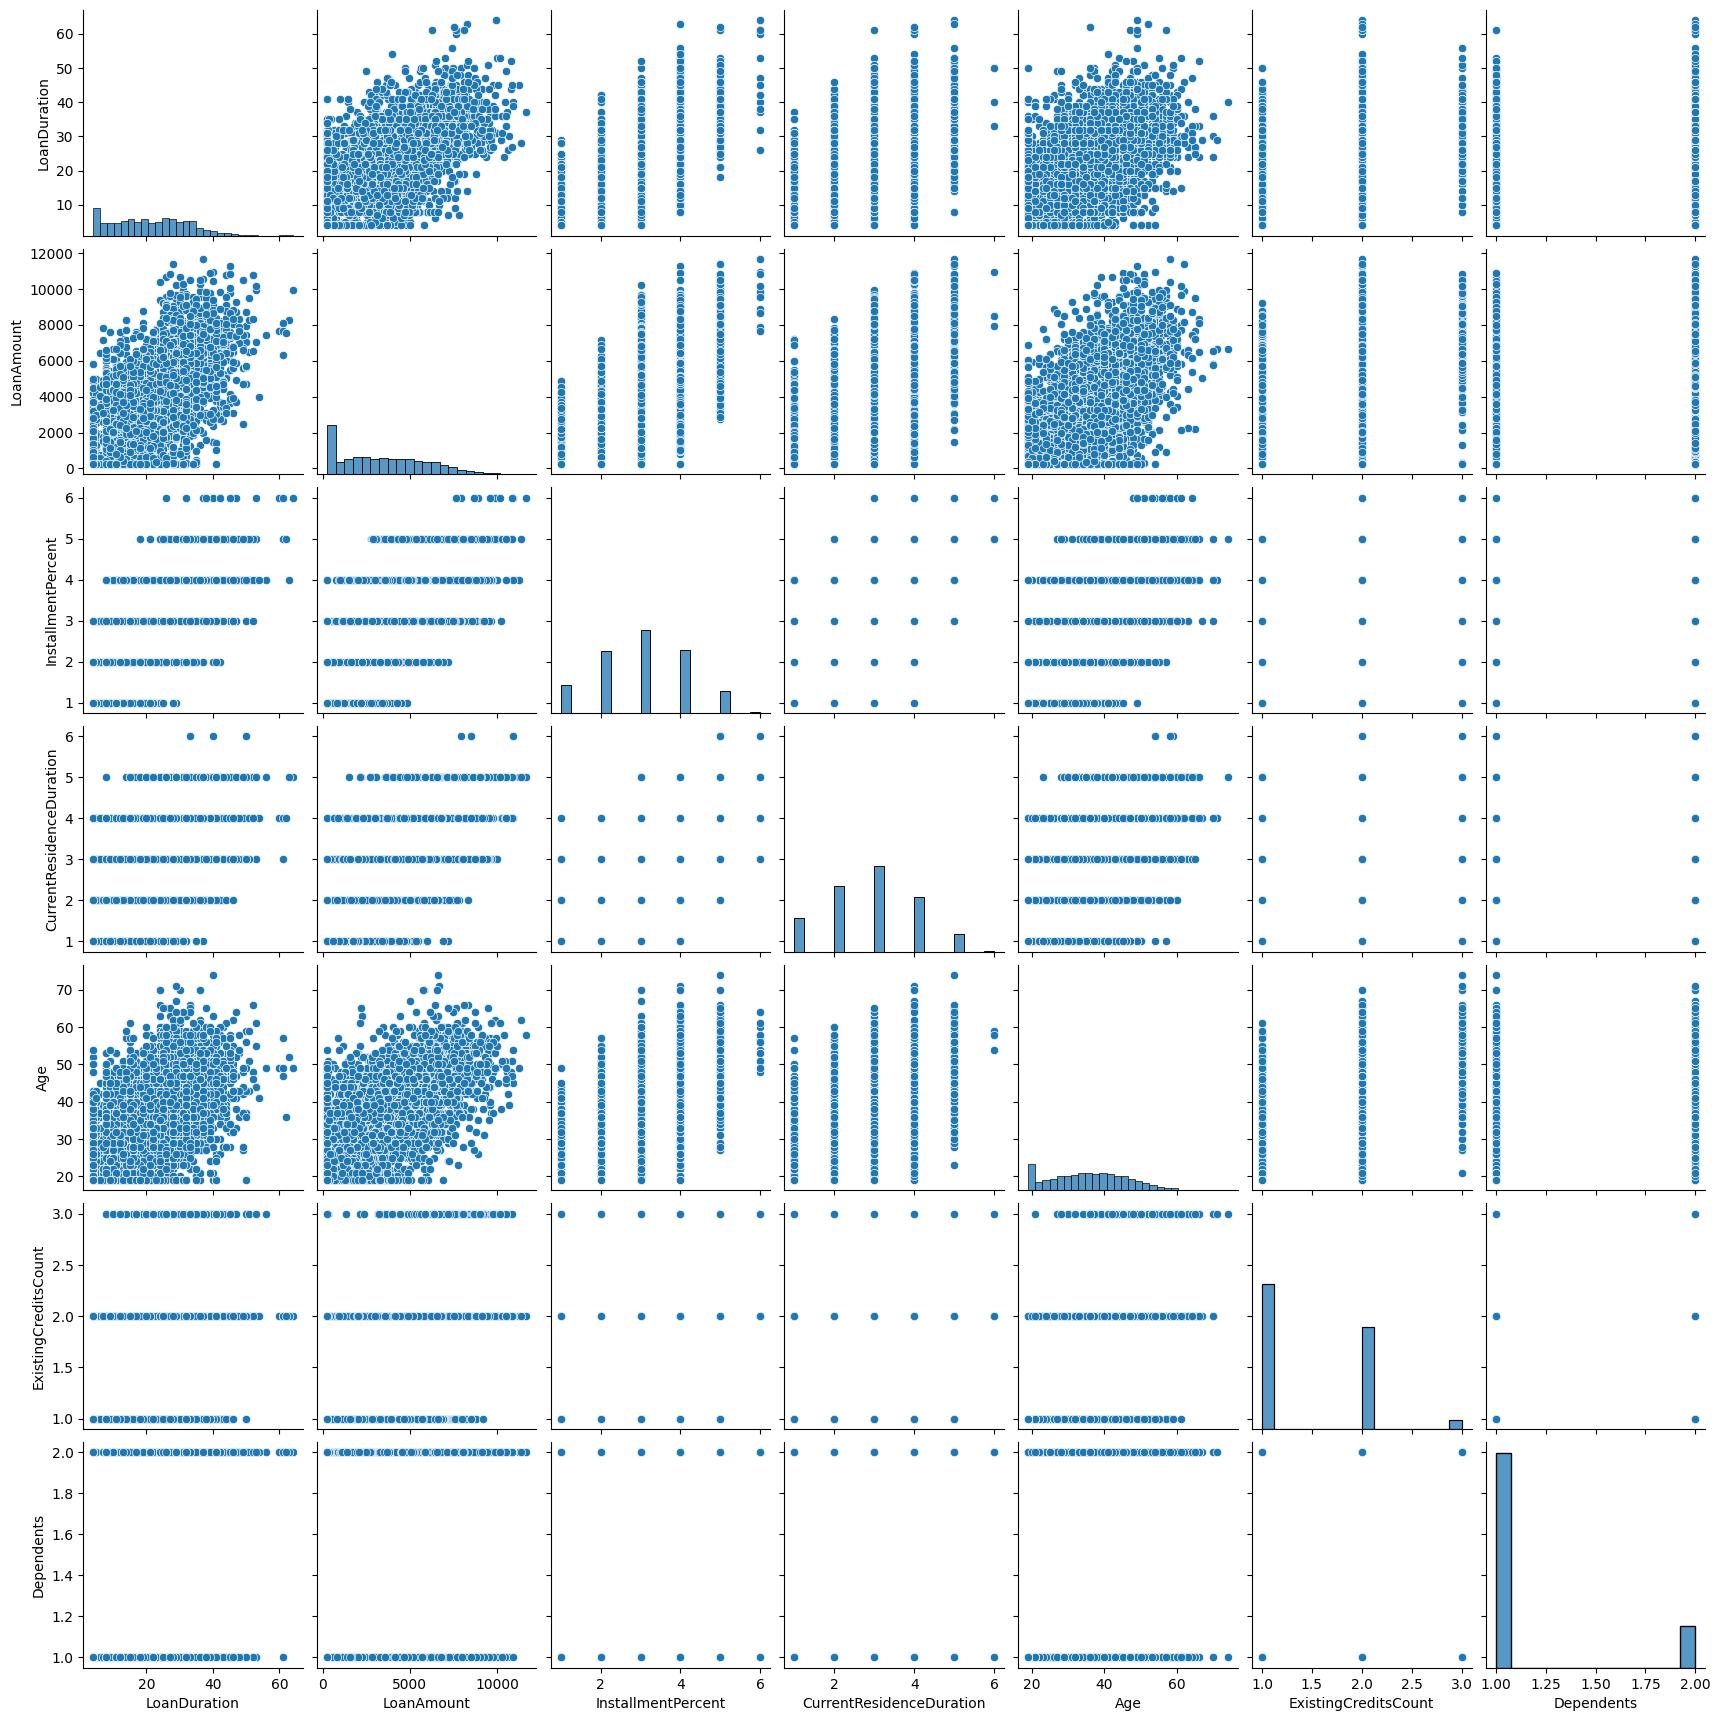

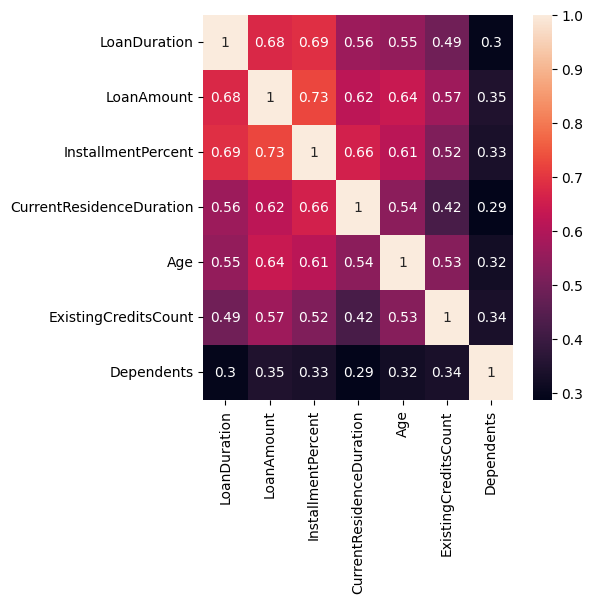

In [10]:
# Bivariate analysis
sns.pairplot(train[numerical_features])

numerical_features_corr = train[numerical_features].corr()

plt.figure(figsize=(5,5))
sns.heatmap(numerical_features_corr, annot=True)

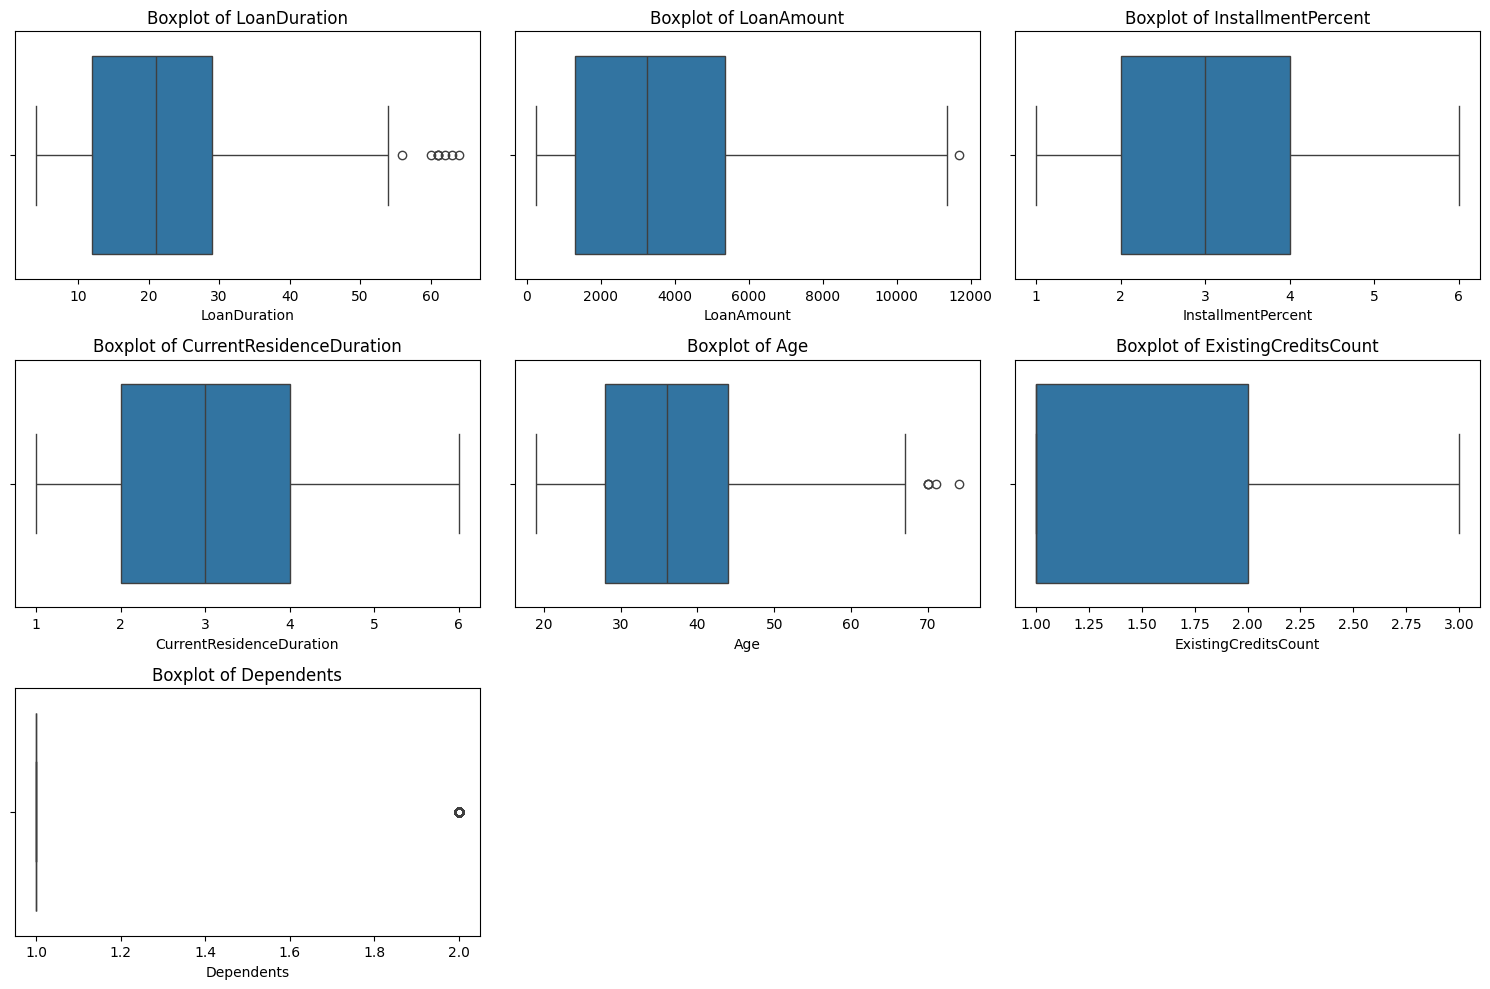

In [11]:
# Box plots for numerical columns to detect outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=train[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()

Text(0.5, 1.0, 'Target distribution (Risk vs NoRik)')

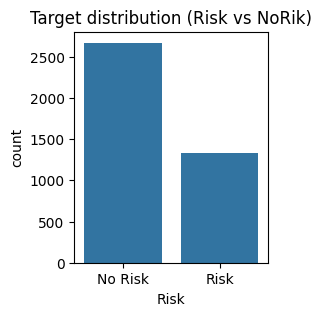

In [12]:
# Distribution of the target variable:
plt.figure(figsize=(2.5,3))
sns.countplot(x="Risk", data=train)
plt.title("Target distribution (Risk vs NoRik)")

We can see on the plot that the "No Risk" profile is twice as represented as the "Risk" profile.

It matches what we can see in the **score** function provided, that takes **train_prop = {'Risk': 1/3, 'No Risk': 2/3}** as variable.

## __Feature Engineering__

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

## __Model__

In [14]:
# EVALUATION
def compute_costs(LoanAmount):
     return({'Risk_No Risk': 5.0 + .6 * LoanAmount, 'No Risk_No Risk': 1.0 - .05 * LoanAmount,
         'Risk_Risk': 1.0, 'No Risk_Risk': 1.0})

def score(solution: pd.DataFrame, submission: pd.DataFrame, row_id_column_name: str) -> float:
   '''
   A custom metric for the German credit dataset
   '''
   real_prop = {'Risk': .02, 'No Risk': .98}
   train_prop = {'Risk': 1/3, 'No Risk': 2/3}
   custom_weight = {'Risk': real_prop['Risk']/train_prop['Risk'], 'No Risk': real_prop['No Risk']/train_prop['No Risk']}
   costs = compute_costs(solution['LoanAmount'])
   y_true = solution['Risk']
   y_pred = submission['Risk']
   loss = (y_true=='Risk') * custom_weight['Risk'] *\
               ((y_pred=='Risk') * costs['Risk_Risk'] + (y_pred=='No Risk') * costs['Risk_No Risk']) +\
            (y_true=='No Risk') * custom_weight['No Risk'] *\
               ((y_pred=='Risk') * costs['No Risk_Risk'] + (y_pred=='No Risk') * costs['No Risk_No Risk'])
   return loss.mean()


In [15]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.9 MB/s eta 0:00:00


In [16]:
import optuna
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [17]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['Risk'])
y = train['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
def objective(trial):
    """
    Hyperparameter tuning using Optuna
    """
    n_estimators = trial.suggest_int("n_estimators", 100, 500, step=50)
    max_depth = trial.suggest_int("max_depth", 5, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    pipeline = make_pipeline(preprocessor, model)

    # Perform cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = []

    for train_idx, val_idx in cv.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        pipeline.fit(X_train_fold, y_train_fold)
        y_pred = pipeline.predict(X_val_fold)

        # Extract LoanAmount for scoring
        solution = pd.DataFrame({'Id': X_val_fold.index, 'Risk': y_val_fold, 'LoanAmount': train.loc[X_val_fold.index, 'LoanAmount']})
        submission = pd.DataFrame({'Id': X_val_fold.index, 'Risk': y_pred, 'LoanAmount': train.loc[X_val_fold.index, 'LoanAmount']})

        # Compute custom loss
        loss = score(solution, submission, row_id_column_name='Id')
        cv_scores.append(loss)

    return np.mean(cv_scores)


study = optuna.create_study(direction = "minimize")
study.optimize(objective, n_trials = 50)

best_parameters = study.best_params
print(f"Best Hyperparameters: {best_parameters}")

best_model = RandomForestClassifier(
    n_estimators=best_parameters["n_estimators"],
    max_depth=best_parameters["max_depth"],
    min_samples_split=best_parameters["min_samples_split"],
    min_samples_leaf=best_parameters["min_samples_leaf"],
    random_state=42
)


[I 2025-02-24 16:43:22,513] A new study created in memory with name: no-name-4cb9dc11-5b38-49bd-b159-771b9bd86dcd
[I 2025-02-24 16:43:30,173] Trial 0 finished with value: -94.80832050983399 and parameters: {'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 0 with value: -94.80832050983399.
[I 2025-02-24 16:43:41,353] Trial 1 finished with value: -93.99899769214673 and parameters: {'n_estimators': 450, 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 0 with value: -94.80832050983399.
[I 2025-02-24 16:43:48,295] Trial 2 finished with value: -94.69537655042545 and parameters: {'n_estimators': 450, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 0 with value: -94.80832050983399.
[I 2025-02-24 16:43:51,390] Trial 3 finished with value: -94.30327997454319 and parameters: {'n_estimators': 250, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value:

Best Hyperparameters: {'n_estimators': 200, 'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 4}


In [ ]:
pipeline = make_pipeline(
    preprocessor,
    best_model
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [ ]:
submission = pd.DataFrame({
    'Id': X_test.index,
    'Risk': y_pred,
    'LoanAmount': X_test['LoanAmount'].values
    })

solution = pd.DataFrame({
    'Id': X_test.index,
    'Risk': y_test,
    'LoanAmount': X_test['LoanAmount'].values
    })

loss = score(solution, submission, row_id_column_name='Id')
print(f'Custom loss is {loss}')

Custom loss is -41.83476695842453


In [ ]:
y_final = pipeline.predict(test)

In [ ]:
final_submission = pd.DataFrame({
    'Id': test.index,
    'Risk': y_final,
    'LoanAmount': test['LoanAmount'].values
})

final_submission.to_csv('submission.csv', index=False)